# 1. Import and Install Dependencies


In [1]:
!python --version


Python 3.10.9


In [2]:
# pip install tensorflow opencv-python mediapipe scikit-learn matplotlib


In [3]:
import cv2           #Used for computer vision tasks, such as capturing video frames and image processing.
import numpy as np   # for efficient numerical operations, especially with large arrays and matrices.
import os            #Used for working with file paths and interacting with the operating system.
from matplotlib import pyplot as plt
import time          #Used for introducing delays between frames, controlling timing, or managing sleep periods.
import mediapipe as mp #Used for pose estimation and other perceptual computing tasks.

# 2. Keypoints using MP Holistic


In [4]:
mp_holistic = mp.solutions.holistic # Holistic model (to make our detections)
mp_drawing = mp.solutions.drawing_utils # Drawing utilities (to actually draw them)

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
# cv2.cvtColor??  #for topic description we can use??

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    
# draw_landmarks -> Function does not return the image but rather applies the landmark visualizations to the current image in place    

In [8]:
mp_drawing.draw_landmarks??

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), #this will going to color the landmarks(dot color) of image
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) #and this will going to color the connection(line color in image)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
#we are just formatting or updating our draw landmark function(that's not complusory though, u can use only standard drwa_landmark func)    
    

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
#         draw_landmarks(image, results)
        draw_styled_landmarks(image, results) #this func is upgraded version of draw_landmark func(give different color on our face) 
    

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
# cap = cv2.VideoCapture(0)         #----same code use for opening webcam in our model
# while cap.isOpened():
    
#     # Read feed
#     ret, frame = cap.read()
#     #show to screen
#     cv2.imshow('OpenCV Feed', frame)
    
#     #Break gracefully
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
## Landmark value: the face and hand landmark models will return no values if nothing is detected. ..The pose model will return landmarks but the visibility value inside of each landmark will be low.


In [15]:
#  frame

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_landmarks(frame, results)

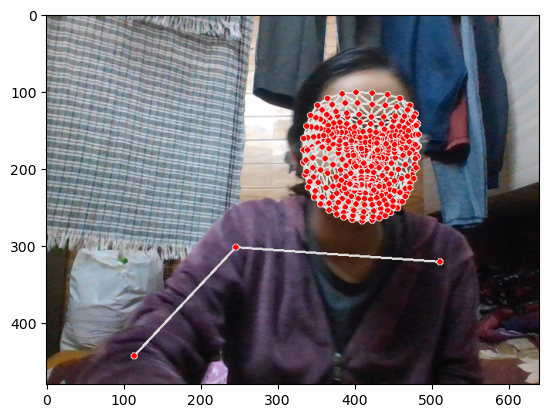

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract keypoint Values

In [19]:
len(results.pose_landmarks.landmark)


33

In [20]:
pose = []               
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
# pose

In [22]:
# in first part pose model is extracting our arrays like we did in above for single landmarks , rmember we just grabbing out each one of the values x , y , z and we're concatenating it together in one big array 
# then flattening it and if statement states that if we got results then we're going to extract these values if we dont have results then we'll replace it with a blank numpy array 
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
face

array([ 0.65159154,  0.44282174, -0.03732777, ...,  0.73196828,
        0.3303878 ,  0.03452205])

In [25]:
result_test = extract_keypoints(results)

In [26]:
result_test


array([ 0.64385736,  0.40332332, -1.34684944, ...,  0.        ,
        0.        ,  0.        ])

In [27]:
extract_keypoints(results).shape

(1662,)

In [28]:
468*3+33*4+21*3+21*3


1662

In [29]:
np.save('0', result_test)   
# saving each frame as a numpy array inside of our 'MP_Data' folder , so we'll have 30 numpy array in each folder of actions

In [30]:
np.load('0.npy')


array([ 0.64385736,  0.40332332, -1.34684944, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
# now setting up our folders for our array collection, so effectively our key points going to form our frame values
# use those extracted key points to go and decode our sign language like human action detector

# 4. Setup Folders for Collection

In [31]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [32]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

# ---we are going to have 3 actions->30 vedios per action -> 30 frames of keypoints per vedios
# then each one of those video sequences are going to contain 30 framesof data. 
# each frame will contain 1662 landmark values i.e. 3*30 sequences , 30 frames , 1662 landmarks

In [33]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [34]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP---
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed (read of capture from our frame)
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic---
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints (extract our different key points and save them into our folders)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
# Collection Breaks-> having breaks between each sequence collection allows you to reset and reposition yourself to collect the action from start to finish 

In [35]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocesses Data and Create Labels and Features

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  
#('to_categorical' convert our data into one hot encoded data)

In [37]:
label_map = {label:num for num, label in enumerate(actions)}
# (create a label dictionary to represent each one of our different actions)

In [38]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [39]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [40]:
np.array(sequences).shape

(90, 30, 1662)

In [41]:
np.array(labels).shape

(90,)

In [42]:
X = np.array(sequences)

In [43]:
X.shape

(90, 30, 1662)

In [44]:
y = to_categorical(labels).astype(int)

In [45]:
# y

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [47]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
# Tensorboard allow us to perform some logging inside of tensorboard if we wanted to go and trace and monitor our model as its training

In [58]:
# create a log directoey and set up our tensorboard callbacks (tensorboard is a webapp offered as part of tensorflow package taht allows u to monitor your neural network training and accuracy)
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [71]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [60]:
res = [.7, 0.2, 0.1]

In [61]:
actions[np.argmax(res)]

'hello'

In [72]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [63]:
model.fit(X_train, y_train, epochs=600, callbacks=[tb_callback])

Epoch 1/600
3/3 [==============================] - 8s 92ms/step - loss: 3.5254 - categorical_accuracy: 0.4235
Epoch 2/600
3/3 [==============================] - 0s 89ms/step - loss: 2.4161 - categorical_accuracy: 0.3294
Epoch 3/600
3/3 [==============================] - 0s 89ms/step - loss: 1.6269 - categorical_accuracy: 0.3765
Epoch 4/600
3/3 [==============================] - 0s 88ms/step - loss: 1.6146 - categorical_accuracy: 0.3176
Epoch 5/600
3/3 [==============================] - 0s 89ms/step - loss: 1.0633 - categorical_accuracy: 0.4118
Epoch 6/600
3/3 [==============================] - 0s 88ms/step - loss: 4.9247 - categorical_accuracy: 0.3294
Epoch 7/600
3/3 [==============================] - 0s 86ms/step - loss: 13.2659 - categorical_accuracy: 0.4000
Epoch 8/600
3/3 [==============================] - 0s 87ms/step - loss: 2.9911 - categorical_accuracy: 0.3294
Epoch 9/600
3/3 [==============================] - 0s 90ms/step - loss: 1.6254 - categorical_accuracy: 0.2706
Epoch 10/

3/3 [==============================] - 0s 90ms/step - loss: 0.5227 - categorical_accuracy: 0.7294
Epoch 75/600
3/3 [==============================] - 0s 90ms/step - loss: 0.4854 - categorical_accuracy: 0.7647
Epoch 76/600
3/3 [==============================] - 0s 93ms/step - loss: 0.4752 - categorical_accuracy: 0.7647
Epoch 77/600
3/3 [==============================] - 0s 89ms/step - loss: 0.4850 - categorical_accuracy: 0.7529
Epoch 78/600
3/3 [==============================] - 0s 88ms/step - loss: 0.4723 - categorical_accuracy: 0.7765
Epoch 79/600
3/3 [==============================] - 0s 88ms/step - loss: 0.4668 - categorical_accuracy: 0.7529
Epoch 80/600
3/3 [==============================] - 0s 89ms/step - loss: 0.4665 - categorical_accuracy: 0.7529
Epoch 81/600
3/3 [==============================] - 0s 90ms/step - loss: 0.4548 - categorical_accuracy: 0.7882
Epoch 82/600
3/3 [==============================] - 0s 89ms/step - loss: 0.4615 - categorical_accuracy: 0.7294
Epoch 83/600
3

3/3 [==============================] - 0s 89ms/step - loss: 0.3223 - categorical_accuracy: 0.8235
Epoch 148/600
3/3 [==============================] - 0s 90ms/step - loss: 0.2581 - categorical_accuracy: 0.9294
Epoch 149/600
3/3 [==============================] - 0s 92ms/step - loss: 0.2494 - categorical_accuracy: 0.9294
Epoch 150/600
3/3 [==============================] - 0s 91ms/step - loss: 0.2096 - categorical_accuracy: 0.9176
Epoch 151/600
3/3 [==============================] - 0s 91ms/step - loss: 0.2135 - categorical_accuracy: 0.9176
Epoch 152/600
3/3 [==============================] - 0s 87ms/step - loss: 0.1830 - categorical_accuracy: 0.9529
Epoch 153/600
3/3 [==============================] - 0s 92ms/step - loss: 0.1855 - categorical_accuracy: 0.9412
Epoch 154/600
3/3 [==============================] - 0s 90ms/step - loss: 0.1865 - categorical_accuracy: 0.9529
Epoch 155/600
3/3 [==============================] - 0s 88ms/step - loss: 0.1504 - categorical_accuracy: 0.9412
Epoch 

3/3 [==============================] - 0s 91ms/step - loss: 0.2941 - categorical_accuracy: 0.8824
Epoch 221/600
3/3 [==============================] - 0s 89ms/step - loss: 0.2517 - categorical_accuracy: 0.9059
Epoch 222/600
3/3 [==============================] - 0s 91ms/step - loss: 0.2759 - categorical_accuracy: 0.8824
Epoch 223/600
3/3 [==============================] - 0s 91ms/step - loss: 0.2131 - categorical_accuracy: 0.9529
Epoch 224/600
3/3 [==============================] - 0s 90ms/step - loss: 0.1870 - categorical_accuracy: 0.9529
Epoch 225/600
3/3 [==============================] - 0s 89ms/step - loss: 0.1920 - categorical_accuracy: 0.9412
Epoch 226/600
3/3 [==============================] - 0s 92ms/step - loss: 0.1900 - categorical_accuracy: 0.9412
Epoch 227/600
3/3 [==============================] - 0s 89ms/step - loss: 0.1914 - categorical_accuracy: 0.9294
Epoch 228/600
3/3 [==============================] - 0s 89ms/step - loss: 0.1289 - categorical_accuracy: 0.9647
Epoch 

3/3 [==============================] - 0s 90ms/step - loss: 0.0226 - categorical_accuracy: 1.0000
Epoch 294/600
3/3 [==============================] - 0s 89ms/step - loss: 0.0271 - categorical_accuracy: 0.9882
Epoch 295/600
3/3 [==============================] - 0s 90ms/step - loss: 0.0266 - categorical_accuracy: 1.0000
Epoch 296/600
3/3 [==============================] - 0s 90ms/step - loss: 0.0229 - categorical_accuracy: 1.0000
Epoch 297/600
3/3 [==============================] - 0s 89ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 298/600
3/3 [==============================] - 0s 89ms/step - loss: 0.0181 - categorical_accuracy: 1.0000
Epoch 299/600
3/3 [==============================] - 0s 93ms/step - loss: 0.0126 - categorical_accuracy: 1.0000
Epoch 300/600
3/3 [==============================] - 0s 91ms/step - loss: 0.0080 - categorical_accuracy: 1.0000
Epoch 301/600
3/3 [==============================] - 0s 88ms/step - loss: 0.0064 - categorical_accuracy: 1.0000
Epoch 

KeyboardInterrupt: 

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [ ]:
# using media pipe holistic model in this particular case that our data is going to be able to fit into memory
# so we dont need to build a data generator to be able to build up a pipeline of data

# 8. Make Predictions

In [65]:
res = model.predict(X_test)

1/1 [==============================] - 1s 935ms/step


In [66]:
actions[np.argmax(res[4])]

'thanks'

In [67]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights 

In [68]:
model.save('action.h5')

D:\Desktop\anaconda23\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
del model

In [73]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy 

In [74]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [75]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 902ms/step


In [76]:
# converts the predictions from their one-hot encoded representation to a categorical label eg 0,1,2 as [1,0,0],[0,1,0],[0,0,1]
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [77]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [78]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real time

In [86]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

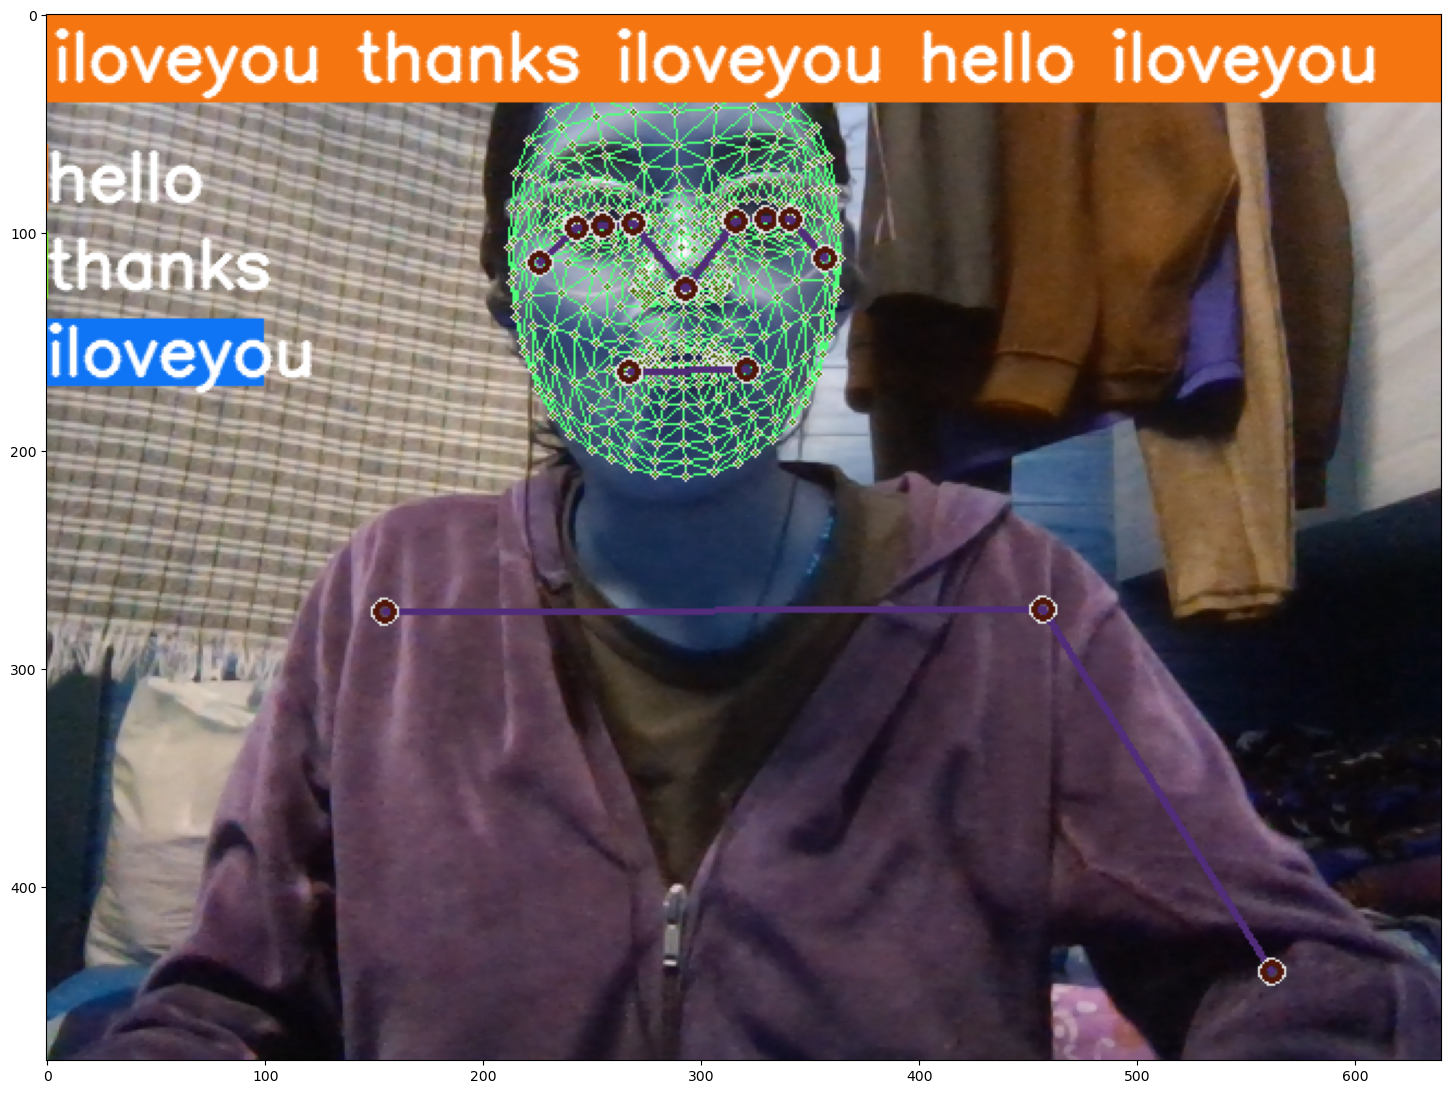

In [87]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [88]:
sequence.reverse()

In [89]:
len(sequence)

30

In [90]:
sequence.append('def')

In [91]:
sequence.reverse()

In [93]:
# sequence[-30:]

In [94]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
ilov

1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'me

1/1 [==============================] - 0s 48ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
thanks
<class 'media

1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 62ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 55ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.pyth

In [95]:
cap.release()
cv2.destroyAllWindows()

In [84]:
res[np.argmax(res)] > threshold

True

In [ ]:
# (num_sequences,30,1662)

In [85]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 52ms/step


array([[1.0625769e-03, 4.8816469e-06, 9.9893254e-01]], dtype=float32)